# 데이터 불러오기

In [162]:
!pwd

/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/GitHub/CAKD07_PROJECT/cakd_LP/WorkSpace/Kim


In [2]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle

import warnings
warnings.filterwarnings('ignore')


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')
display(competitor)
# 고객DEMO
pp_demo = pd.read_pickle("../../DATA_preprocessed/pp_demo.pickle")
display(pp_demo)
# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')
display(member)
# 채널이용
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')
display(channel)

# 상금 거래 관련
pp_purprd_prodcl = pd.read_pickle('../../DATA_preprocessed/pp_purprd_prodcl.pickle')
pp_purprd_prodcl

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도
...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구
19379,19380,F,20세~24세,서울특별시 마포구
19380,19381,F,40세~44세,부산광역시
19381,19382,F,45세~49세,부산광역시


,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가


# EDA

## 분기 Feature 만들기

In [3]:
# 분기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<=3)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>3)&(pp_purprd_prodcl['구매_월']<=6))
cond_2014_3 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>6)&(pp_purprd_prodcl['구매_월']<=9))
cond_2014_4 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>9)&(pp_purprd_prodcl['구매_월']<=12))
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<=3)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>3)&(pp_purprd_prodcl['구매_월']<=6))
cond_2015_3 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>6)&(pp_purprd_prodcl['구매_월']<=9))
cond_2015_4 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>9)&(pp_purprd_prodcl['구매_월']<=12))

pp_purprd_prodcl['분기']=0

pp_purprd_prodcl.loc[cond_2014_1,'분기']='14_1'
pp_purprd_prodcl.loc[cond_2014_2,'분기']='14_2'
pp_purprd_prodcl.loc[cond_2014_3,'분기']='14_3'
pp_purprd_prodcl.loc[cond_2014_4,'분기']='14_4'
pp_purprd_prodcl.loc[cond_2015_1,'분기']='15_1'
pp_purprd_prodcl.loc[cond_2015_2,'분기']='15_2'
pp_purprd_prodcl.loc[cond_2015_3,'분기']='15_3'
pp_purprd_prodcl.loc[cond_2015_4,'분기']='15_4'

pp_purprd_prodcl

,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev,분기
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,14_2
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,14_3
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,15_1
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,15_1


## 분기별 변동지수 feature 생성 : 총 매출합 기준

### 변동지수 생성 사용자 함수 : 고객별 분기 매출 등급 변화량 지수화 

In [91]:
def var_calculation(df,option):
# 등급 부여 사용자 정의 함수
    def make_cust_sale_grade(x,y):
        if x > lev_dict[y][7]:
            return 9
        elif x > lev_dict[y][6]:
            return 8
        elif x > lev_dict[y][5]:
            return 7
        elif x > lev_dict[y][4]:
            return 6
        elif x > lev_dict[y][3]:
            return 5
        elif x > lev_dict[y][2]:
            return 4
        elif x > lev_dict[y][1]:
            return 3
        elif x > lev_dict[y][0]:
            return 2
        else:
            return 1
    
# 총구매액(sum), 방문횟수(count), 평균지출액(mean) 기준 선택에 따른 옵션 
    # option='sum'
    pp_pv = df.pivot_table(index=['고객번호'],columns=['분기'],values='구매금액',aggfunc=(f'{option}'),fill_value=0)   


# 등급 부여
    # 고객 총구매액 list up 을 위한 각 분위 percentile 기준 값 저장 dictionary
    lev_dict = {}
    for season in ['14_1', '14_2', '14_3', '14_4', '15_1', '15_2', '15_3', '15_4']:
        instance=pp_pv[season]
        lev_list=[]
        for j in [4, 11, 23, 40, 60, 77, 89, 96]:
            lev_list.append(np.percentile(instance,j))
        lev_dict[season] = lev_list
    # print(lev_dict)
    
    # 2014
    pp_pv['14_1_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_1'],'14_1'),axis=1)
    pp_pv['14_2_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_2'],'14_2'),axis=1)
    pp_pv['14_3_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_3'],'14_3'),axis=1)
    pp_pv['14_4_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_4'],'14_4'),axis=1)
    # 2015
    pp_pv['15_1_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_1'],'15_1'),axis=1)
    pp_pv['15_2_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_2'],'15_2'),axis=1)
    pp_pv['15_3_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_3'],'15_3'),axis=1)
    pp_pv['15_4_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_4'],'15_4'),axis=1)
    # display(pp_pv)
    pp_pv['14_2-14_1'] = (pp_pv['14_2_등급']-pp_pv['14_1_등급']) 
    pp_pv['14_3-14_2'] = (pp_pv['14_3_등급']-pp_pv['14_2_등급'])
    pp_pv['14_4-14_3'] = (pp_pv['14_4_등급']-pp_pv['14_3_등급'])
    pp_pv['15_1-14_4'] = (pp_pv['15_1_등급']-pp_pv['14_4_등급'])
    pp_pv['15_2-15_1'] = (pp_pv['15_2_등급']-pp_pv['15_1_등급'])
    pp_pv['15_3-15_2'] = (pp_pv['15_3_등급']-pp_pv['15_2_등급'])
    pp_pv['15_4-15_3'] = (pp_pv['15_4_등급']-pp_pv['14_3_등급'])

    
    
    
# 변동지수(변화량)에 가중치 부여 (가중치 최근 분기 일수록 옾은 가중치 부여)
    coeff_var = np.linspace(1,1.5,num=6) # 1부터 0.1씩 증가
    # coeff_var=[1, 1, 1, 1, 1, 1]
    pp_pv['15_3분기_변동지수'] = (pp_pv['14_2-14_1'])*coeff_var[0] +\
                            (pp_pv['14_3-14_2'])*coeff_var[1] +\
                            (pp_pv['14_4-14_3'])*coeff_var[2] +\
                            (pp_pv['15_1-14_4'])*coeff_var[3] +\
                            (pp_pv['15_2-15_1'])*coeff_var[4] +\
                            (pp_pv['15_3-15_2'])*coeff_var[5]

    pp_pv['15_4분기_변동지수'] = (pp_pv['14_3-14_2'])*coeff_var[0] +\
                            (pp_pv['14_4-14_3'])*coeff_var[1] +\
                            (pp_pv['15_1-14_4'])*coeff_var[2] +\
                            (pp_pv['15_2-15_1'])*coeff_var[3] +\
                            (pp_pv['15_3-15_2'])*coeff_var[4] +\
                            (pp_pv['15_4-15_3'])*coeff_var[5]

    # pp_pv.drop(columns=['14_1', '14_2', '14_3', '14_4', '15_1', '15_2', '15_3', '15_4'],inplace=True)
    pp_pv=pp_pv[['14_2-14_1', '14_3-14_2','14_4-14_3','15_1-14_4','15_2-15_1','15_3-15_2','15_4-15_3','15_3분기_변동지수','15_4분기_변동지수']]
# 고객 Demo Data -> One-Hot 인코딩
    # pp_demo = pd.get_dummies(pp_demo)
# Merge
    # df = pd.merge(pp_demo, pp_pv, on='고객번호')
    
    
    
    return pp_pv

final_pp_purprd_prodcl = var_calculation(pp_purprd_prodcl,'sum')
final_pp_purprd_prodcl

분기,14_2-14_1,14_3-14_2,14_4-14_3,15_1-14_4,15_2-15_1,15_3-15_2,15_4-15_3,15_3분기_변동지수,15_4분기_변동지수
고객번호,,,,,,,,,
1,0,0,1,-1,0,0,-1,-0.1,-1.6
2,-1,1,-2,2,-1,1,-1,0.4,-0.2
3,0,0,-1,0,0,0,-1,-1.2,-2.6
4,2,0,-1,0,0,0,-2,0.8,-4.1
5,-1,0,-4,4,-3,-1,1,-6.3,-3.4
...,...,...,...,...,...,...,...,...,...
19379,0,0,2,0,1,-2,3,0.8,5.2
19380,0,0,0,0,0,0,4,0.0,6.0
19381,0,0,0,2,1,1,3,5.5,9.6


### 구매 감소 고객 이진 분류를 위한 변동 지수 기준 정하기

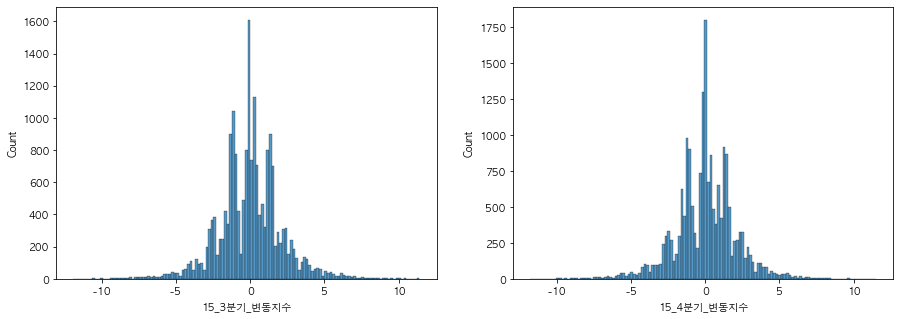

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(final_pp_purprd_prodcl['15_3분기_변동지수'])
plt.subplot(1,2,2)
sns.histplot(final_pp_purprd_prodcl['15_4분기_변동지수'])
plt.show()

## 변동지수 -> 구매 감소 고객 이진 분류 정의

In [92]:
def get_pp_cust(df,option):
    final_df = var_calculation(df,option)

    # 구매 감소 고객(Reduced purchases by customers) 정의
    def find_RP_by_cus(x):
        if x < 0:
            return 1 # 감소
        else:
            return 0 # 증가
    final_df['15_3분기_변동지수'] = final_df['15_3분기_변동지수'].apply(find_RP_by_cus)
    final_df['15_4분기_변동지수'] = final_df['15_4분기_변동지수'].apply(find_RP_by_cus)
    
    
    return final_df

# final_pp_purprd_prodcl = get_pp_cust(pp_purprd_prodcl,'sum')
# final_pp_purprd_prodcl

In [93]:
# 대분류 카테고리 추가
pp_filter = pp_purprd_prodcl[pp_purprd_prodcl['대분류명']=='패션잡화']
a=get_pp_cust(pp_filter,'sum').iloc[:,:-2]
pp_filter = pp_purprd_prodcl[pp_purprd_prodcl['대분류명']=='식품']
b=get_pp_cust(pp_filter,'sum').iloc[:,:-2]
pp_filter = pp_purprd_prodcl[pp_purprd_prodcl['대분류명']=='일상용품']
c=get_pp_cust(pp_filter,'sum').iloc[:,:-2]

# TYPE 추가
pp_filter = pp_purprd_prodcl[pp_purprd_prodcl['TYPE']=='전문품']
d=get_pp_cust(pp_filter,'sum').iloc[:,:-2]
pp_filter = pp_purprd_prodcl[pp_purprd_prodcl['TYPE']=='선매품']
e=get_pp_cust(pp_filter,'sum').iloc[:,:-2]

# lev 추가
pp_filter = pp_purprd_prodcl[pp_purprd_prodcl['lev']=='중가']
f=get_pp_cust(pp_filter,'sum').iloc[:,:-2]
pp_filter = pp_purprd_prodcl[pp_purprd_prodcl['lev']=='고가']
g=get_pp_cust(pp_filter,'sum').iloc[:,:-2]



pp_filter = pp_purprd_prodcl
h = get_pp_cust(pp_filter,'sum').iloc[:,-2:]
df_final = pd.concat([a,b,c,d,e,f,g,h],axis=1)

In [94]:
df_final=df_final.fillna(1)
df_final.columns

Index(['14_2-14_1', '14_3-14_2', '14_4-14_3', '15_1-14_4', '15_2-15_1',
       '15_3-15_2', '15_4-15_3', '14_2-14_1', '14_3-14_2', '14_4-14_3',
       '15_1-14_4', '15_2-15_1', '15_3-15_2', '15_4-15_3', '14_2-14_1',
       '14_3-14_2', '14_4-14_3', '15_1-14_4', '15_2-15_1', '15_3-15_2',
       '15_4-15_3', '14_2-14_1', '14_3-14_2', '14_4-14_3', '15_1-14_4',
       '15_2-15_1', '15_3-15_2', '15_4-15_3', '14_2-14_1', '14_3-14_2',
       '14_4-14_3', '15_1-14_4', '15_2-15_1', '15_3-15_2', '15_4-15_3',
       '14_2-14_1', '14_3-14_2', '14_4-14_3', '15_1-14_4', '15_2-15_1',
       '15_3-15_2', '15_4-15_3', '14_2-14_1', '14_3-14_2', '14_4-14_3',
       '15_1-14_4', '15_2-15_1', '15_3-15_2', '15_4-15_3', '15_3분기_변동지수',
       '15_4분기_변동지수'],
      dtype='object', name='분기')

## 머신러닝 예측

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### 평가 결과 출력 사용자 함수

In [96]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 머신러닝 예측

In [97]:
df_final.columns

Index(['14_2-14_1', '14_3-14_2', '14_4-14_3', '15_1-14_4', '15_2-15_1',
       '15_3-15_2', '15_4-15_3', '14_2-14_1', '14_3-14_2', '14_4-14_3',
       '15_1-14_4', '15_2-15_1', '15_3-15_2', '15_4-15_3', '14_2-14_1',
       '14_3-14_2', '14_4-14_3', '15_1-14_4', '15_2-15_1', '15_3-15_2',
       '15_4-15_3', '14_2-14_1', '14_3-14_2', '14_4-14_3', '15_1-14_4',
       '15_2-15_1', '15_3-15_2', '15_4-15_3', '14_2-14_1', '14_3-14_2',
       '14_4-14_3', '15_1-14_4', '15_2-15_1', '15_3-15_2', '15_4-15_3',
       '14_2-14_1', '14_3-14_2', '14_4-14_3', '15_1-14_4', '15_2-15_1',
       '15_3-15_2', '15_4-15_3', '14_2-14_1', '14_3-14_2', '14_4-14_3',
       '15_1-14_4', '15_2-15_1', '15_3-15_2', '15_4-15_3', '15_3분기_변동지수',
       '15_4분기_변동지수'],
      dtype='object', name='분기')

In [87]:
df_final.head()

분기,14_2-14_1,14_3-14_2,14_4-14_3,15_1-14_4,15_2-15_1,15_3-15_2,15_4-15_3,14_2-14_1,14_3-14_2,14_4-14_3,...,15_4-15_3,14_2-14_1,14_3-14_2,14_4-14_3,15_1-14_4,15_2-15_1,15_3-15_2,15_4-15_3,15_3분기_변동지수,15_4분기_변동지수
고객번호,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [88]:
df_final.head()

분기,14_2-14_1,14_3-14_2,14_4-14_3,15_1-14_4,15_2-15_1,15_3-15_2,15_4-15_3,14_2-14_1,14_3-14_2,14_4-14_3,...,15_4-15_3,14_2-14_1,14_3-14_2,14_4-14_3,15_1-14_4,15_2-15_1,15_3-15_2,15_4-15_3,15_3분기_변동지수,15_4분기_변동지수
고객번호,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [98]:
def ml_by_filter(df_final,pp_demo):
    # for filter_ in filters:
        # df=pp_purprd_prodcl[pp_purprd_prodcl['대분류명']==filter_]
    # df = df_final
    # 고객 Demo Data -> One-Hot 인코딩
    pp_demo = pd.get_dummies(pp_demo)
    # Merge
    final_df = pd.merge(pp_demo, df_final, on='고객번호')
    display(final_df)
    print()
    X_train = final_df.drop(['15_3분기_변동지수','15_4분기_변동지수','15_3-15_2','15_4-15_3'], axis=1)
    y_train = final_df['15_3분기_변동지수']
    # print(f'X_train{X_train.columns}')

    X_test = final_df.drop(['15_3분기_변동지수','15_4분기_변동지수','14_2-14_1','15_4-15_3'], axis=1)
    # print(f'X_test{X_test.columns}')
    y_test = final_df['15_4분기_변동지수']
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    lr_clf = LogisticRegression(solver='liblinear')
    dt_clf = DecisionTreeClassifier()
    rf_clf = RandomForestClassifier()
    
    lr_clf.fit(X_train , y_train)
    dt_clf.fit(X_train , y_train)
    rf_clf.fit(X_train , y_train)
    
    pred_lr = lr_clf.predict(X_test)
    pred_dt = dt_clf.predict(X_test)
    pred_rf = rf_clf.predict(X_test)
    
    pred_proba_lr = lr_clf.predict_proba(X_test)[:, 1]
    pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]
    pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

    get_clf_eval(y_test , pred_lr, pred_proba_lr)
    get_clf_eval(y_test , pred_dt, pred_proba_dt)
    get_clf_eval(y_test , pred_rf, pred_proba_rf)
    
    
    return 0

ml_by_filter(df_final,pp_demo)

,고객번호,성별_F,성별_M,연령대_19세이하,연령대_20세~24세,연령대_25세~29세,연령대_30세~34세,연령대_35세~39세,연령대_40세~44세,연령대_45세~49세,...,15_4-15_3,14_2-14_1,14_3-14_2,14_4-14_3,15_1-14_4,15_2-15_1,15_3-15_2,15_4-15_3,15_3분기_변동지수,15_4분기_변동지수
0,1,0,1,0,0,0,0,0,0,0,...,-1.0,1.0,0.0,-1.0,0.0,0.0,1.0,-2.0,1,1
1,2,0,1,0,0,0,0,0,0,0,...,-1.0,0.0,1.0,-2.0,1.0,0.0,1.0,-1.0,0,1
2,3,0,1,0,0,0,0,0,0,0,...,-1.0,-1.0,1.0,1.0,-2.0,-1.0,2.0,-1.0,1,1
3,4,1,0,0,0,0,0,0,0,0,...,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,0,1
4,5,0,1,0,0,0,0,0,0,0,...,-1.0,0.0,-1.0,-1.0,2.0,0.0,-5.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1,0,0,1,0,0,0,0,0,...,2.0,0.0,0.0,5.0,-2.0,0.0,-2.0,4.0,0,0
19379,19380,1,0,0,1,0,0,0,0,0,...,3.0,0.0,0.0,0.0,3.0,-3.0,2.0,4.0,0,0
19380,19381,1,0,0,0,0,0,0,1,0,...,3.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,0,0
19381,19382,1,0,0,0,0,0,0,0,1,...,3.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,0,0



오차 행렬
[[7897 2174]
 [3064 6248]]
정확도: 0.7298, 정밀도: 0.7419, 재현율: 0.6710,          F1: 0.7046, AUC:0.8100
오차 행렬
[[5820 4251]
 [4419 4893]]
정확도: 0.5527, 정밀도: 0.5351, 재현율: 0.5255,          F1: 0.5302, AUC:0.5517
오차 행렬
[[7257 2814]
 [4072 5240]]
정확도: 0.6447, 정밀도: 0.6506, 재현율: 0.5627,          F1: 0.6035, AUC:0.7061


0

##

In [4]:
from pycaret.classification import *# 분기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<=3)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>3)&(pp_purprd_prodcl['구매_월']<=6))
cond_2014_3 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>6)&(pp_purprd_prodcl['구매_월']<=9))
cond_2014_4 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>9)&(pp_purprd_prodcl['구매_월']<=12))
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<=3)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>3)&(pp_purprd_prodcl['구매_월']<=6))
cond_2015_3 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>6)&(pp_purprd_prodcl['구매_월']<=9))
cond_2015_4 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>9)&(pp_purprd_prodcl['구매_월']<=12))

pp_purprd_prodcl['분기']=0

pp_purprd_prodcl.loc[cond_2014_1,'분기']='14_1'
pp_purprd_prodcl.loc[cond_2014_2,'분기']='14_2'
pp_purprd_prodcl.loc[cond_2014_3,'분기']='14_3'
pp_purprd_prodcl.loc[cond_2014_4,'분기']='14_4'
pp_purprd_prodcl.loc[cond_2015_1,'분기']='15_1'
pp_purprd_prodcl.loc[cond_2015_2,'분기']='15_2'
pp_purprd_prodcl.loc[cond_2015_3,'분기']='15_3'
pp_purprd_prodcl.loc[cond_2015_4,'분기']='15_4'

pp_purprd_prodcl

,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev,분기
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,14_2
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,14_3
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,15_1
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,15_1


In [63]:
feature_set = {
    '대분류명' : ['패션잡화','식품','일상용품'],
    'TYPE' : ['편의품','선매품'],
    'lev' : ['중가','고가'],
    '구매금액' : ['구매금액']
}

In [174]:
def make_cust_sale_grade(x, y):
    if x > fractile_list[y][7]:
        return 9
    elif x > fractile_list[y][6]:
        return 8
    elif x > fractile_list[y][5]:
        return 7
    elif x > fractile_list[y][4]:
        return 6
    elif x > fractile_list[y][3]:
        return 5
    elif x > fractile_list[y][2]:
        return 4
    elif x > fractile_list[y][1]:
        return 3
    elif x > fractile_list[y][0]:
        return 2
    else:
        return 1 
    
    
pp_datasets = pp_demo['고객번호']
for i in feature_set.keys():
    for j in range(len(feature_set[i])):
#         print(i,feature_set[i][j])
        option = 'sum'  # check
        if feature_set[i][j] == '구매금액':
            pp_pivot = pp_purprd_prodcl.pivot_table(index=['고객번호'], columns=['분기'], values='구매금액', aggfunc=(f'{option}'), fill_value=0)
        else:
            pp_pivot = pp_purprd_prodcl[pp_purprd_prodcl[i]==feature_set[i][j]].pivot_table(index=['고객번호'], columns=['분기'], values='구매금액', aggfunc=(f'{option}'), fill_value=0)
        
        
        Q_list = ['14_1', '14_2', '14_3', '14_4', '15_1', '15_2', '15_3', '15_4']
        fractile_list = {}
        for Q in Q_list:
            fractiles = []
            for percentile in [4, 11, 23, 40, 60, 77, 89, 96]:
                fractiles.append(np.percentile(pp_pivot[Q], percentile))
                fractile_list[Q] = fractiles
                
        for Q in Q_list:
            pp_pivot[str(Q)] = pp_pivot.apply(lambda row: make_cust_sale_grade(row[Q], Q), axis=1)
            
        pp_pivot[str(feature_set[i][j])+'_14_2-14_1'] = (pp_pivot['14_2']-pp_pivot['14_1'])*1
        pp_pivot[str(feature_set[i][j])+'_14_3-14_2'] = (pp_pivot['14_3']-pp_pivot['14_2'])*1.1
        pp_pivot[str(feature_set[i][j])+'_14_4-14_3'] = (pp_pivot['14_4']-pp_pivot['14_3'])*1.2
        pp_pivot[str(feature_set[i][j])+'_15_1-14_4'] = (pp_pivot['15_1']-pp_pivot['14_4'])*1.3
        pp_pivot[str(feature_set[i][j])+'_15_2-15_1'] = (pp_pivot['15_2']-pp_pivot['15_1'])*1.4
        pp_pivot[str(feature_set[i][j])+'_15_3-15_2'] = (pp_pivot['15_3']-pp_pivot['15_2'])*1.5
        pp_pivot[str(feature_set[i][j])+'_15_4-15_3'] = (pp_pivot['15_4']-pp_pivot['14_3'])*1.6

        pp_pivot = pp_pivot.drop(columns=Q_list).reset_index()
#         display(pp_pivot)
        if feature_set[i][j] == '구매금액':
            # 변동지수(변화량)에 가중치 부여 (가중치 최근 분기 일수록 옾은 가중치 부여)
#             coeff_var = np.linspace(1,1.5,num=6) # 1부터 0.1씩 증가
            coeff_var=[1, 1, 1, 1, 1, 1]
            pp_pivot[str(feature_set[i][j])+'_15_3분기_변동지수'] = (pp_pivot[str(feature_set[i][j])+'_14_2-14_1'])*coeff_var[0] +\
                                    (pp_pivot[str(feature_set[i][j])+'_14_3-14_2'])*coeff_var[1] +\
                                    (pp_pivot[str(feature_set[i][j])+'_14_4-14_3'])*coeff_var[2] +\
                                    (pp_pivot[str(feature_set[i][j])+'_15_1-14_4'])*coeff_var[3] +\
                                    (pp_pivot[str(feature_set[i][j])+'_15_2-15_1'])*coeff_var[4] +\
                                    (pp_pivot[str(feature_set[i][j])+'_15_3-15_2'])*coeff_var[5]

            pp_pivot[str(feature_set[i][j])+'_15_4분기_변동지수'] = (pp_pivot[str(feature_set[i][j])+'_14_3-14_2'])*coeff_var[0] +\
                                    (pp_pivot[str(feature_set[i][j])+'_14_4-14_3'])*coeff_var[1] +\
                                    (pp_pivot[str(feature_set[i][j])+'_15_1-14_4'])*coeff_var[2] +\
                                    (pp_pivot[str(feature_set[i][j])+'_15_2-15_1'])*coeff_var[3] +\
                                    (pp_pivot[str(feature_set[i][j])+'_15_3-15_2'])*coeff_var[4] +\
                                    (pp_pivot[str(feature_set[i][j])+'_15_4-15_3'])*coeff_var[5]
        else:
            pass
        
        pp_datasets = pd.merge(pp_datasets, pp_pivot, on='고객번호', how='left')
        
def find_RP_by_cus(x):
    if x < 0:
        return 1 # 감소
    else:
        return 0 # 증가
pp_datasets['구매금액_15_3분기_변동지수'] = pp_datasets['구매금액_15_3분기_변동지수'].apply(find_RP_by_cus)
pp_datasets['구매금액_15_4분기_변동지수'] = pp_datasets['구매금액_15_4분기_변동지수'].apply(find_RP_by_cus)
pp_datasets.fillna(0)
pp_datasets.rename(index={'분기':'index'})
pp_datasets

,고객번호,패션잡화_14_2-14_1,패션잡화_14_3-14_2,패션잡화_14_4-14_3,패션잡화_15_1-14_4,패션잡화_15_2-15_1,패션잡화_15_3-15_2,패션잡화_15_4-15_3,식품_14_2-14_1,식품_14_3-14_2,...,고가_15_4-15_3,구매금액_14_2-14_1,구매금액_14_3-14_2,구매금액_14_4-14_3,구매금액_15_1-14_4,구매금액_15_2-15_1,구매금액_15_3-15_2,구매금액_15_4-15_3,구매금액_15_3분기_변동지수,구매금액_15_4분기_변동지수
0,1,1.0,0.0,0.0,0.0,0.0,0.0,-1.6,1.0,-3.3,...,-3.2,0,0.0,1.2,-1.3,0.0,0.0,-1.6,1,1
1,2,0.0,1.1,-1.2,1.3,-1.4,1.5,-1.6,0.0,-1.1,...,-1.6,-1,1.1,-2.4,2.6,-1.4,1.5,-1.6,0,1
2,3,0.0,0.0,0.0,0.0,0.0,0.0,3.2,0.0,1.1,...,-1.6,0,0.0,-1.2,0.0,0.0,0.0,-1.6,1,1
3,4,1.0,-1.1,-2.4,1.3,0.0,1.5,-1.6,2.0,-3.3,...,0.0,2,0.0,-1.2,0.0,0.0,0.0,-3.2,0,1
4,5,0.0,0.0,-4.8,0.0,0.0,0.0,0.0,-1.0,-1.1,...,3.2,-1,0.0,-4.8,5.2,-4.2,-1.5,1.6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,3.3,1.2,0.0,-1.4,1.5,3.2,0.0,0.0,...,6.4,0,0.0,2.4,0.0,1.4,-3.0,4.8,0,0
19379,19380,0.0,0.0,0.0,0.0,4.2,-4.5,6.4,0.0,0.0,...,6.4,0,0.0,0.0,0.0,0.0,0.0,6.4,0,0
19380,19381,0.0,0.0,0.0,5.2,-5.6,4.5,3.2,0.0,0.0,...,6.4,0,0.0,0.0,2.6,1.4,1.5,4.8,0,0
19381,19382,0.0,0.0,0.0,3.9,-4.2,0.0,0.0,0.0,0.0,...,4.8,0,0.0,0.0,1.3,1.4,1.5,4.8,0,0


# 머신러닝

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


### 평가 결과 출력 사용자 함수

In [176]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [177]:
def ml_by_filter(df_final,pp_demo):
    # 고객 Demo Data -> One-Hot 인코딩
    pp_demo = pd.get_dummies(pp_demo)
    # Merge
    final_df = pd.merge(pp_demo, df_final, on='고객번호').fillna(0)
    display(final_df)

    a = pd.Series(final_df.columns, name='컬럼')[pd.Series(final_df.columns, name='컬럼').str.contains('15_3-15_2')].values.tolist()
    b = pd.Series(final_df.columns, name='컬럼')[pd.Series(final_df.columns, name='컬럼').str.contains('15_4-15_3')].values.tolist()
    li = ['구매금액_15_3분기_변동지수','구매금액_15_4분기_변동지수']
    li = li + a + b
    X_train = final_df.drop(columns=li)
    for i in X_train.columns:
        X_train[i]
    y_train = final_df['구매금액_15_3분기_변동지수']
    
    a = pd.Series(final_df.columns, name='컬럼')[pd.Series(final_df.columns, name='컬럼').str.contains('14_2-14_1')].values.tolist()
    b = pd.Series(final_df.columns, name='컬럼')[pd.Series(final_df.columns, name='컬럼').str.contains('15_4-15_3')].values.tolist()
    li = ['구매금액_15_3분기_변동지수','구매금액_15_4분기_변동지수']
    li = li + a + b
    X_test = final_df.drop(columns=li)
    y_test = final_df['구매금액_15_4분기_변동지수']

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    lr_clf = LogisticRegression(solver='liblinear')
    dt_clf = DecisionTreeClassifier()
    rf_clf = RandomForestClassifier()
    lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=50, n_jobs=-1, boost_from_average=False)
    xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1 )
    
    lr_clf.fit(X_train , y_train)
    dt_clf.fit(X_train , y_train)
    rf_clf.fit(X_train , y_train)
    lgbm_clf.fit(X_train, y_train)
    xgb_clf.fit(X_train, y_train)
    
    pred_lr = lr_clf.predict(X_test)
    pred_dt = dt_clf.predict(X_test)
    pred_rf = rf_clf.predict(X_test)
    pred_lgbm = lgbm_clf.predict(X_test)
    pred_xgb = xgb_clf.predict(X_test)
    
    pred_proba_lr = lr_clf.predict_proba(X_test)[:, 1]
    pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]
    pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
    pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]
    pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]
    
    get_clf_eval(y_test, pred_lr, pred_proba_lr)
    get_clf_eval(y_test, pred_dt, pred_proba_dt)
    get_clf_eval(y_test, pred_rf, pred_proba_rf)
    get_clf_eval(y_test, pred_lgbm, pred_proba_lgbm)
    get_clf_eval(y_test, pred_xgb, pred_proba_xgb)
    
ml_by_filter(pp_datasets,pp_demo)

,고객번호,성별_F,성별_M,연령대_19세이하,연령대_20세~24세,연령대_25세~29세,연령대_30세~34세,연령대_35세~39세,연령대_40세~44세,연령대_45세~49세,...,고가_15_4-15_3,구매금액_14_2-14_1,구매금액_14_3-14_2,구매금액_14_4-14_3,구매금액_15_1-14_4,구매금액_15_2-15_1,구매금액_15_3-15_2,구매금액_15_4-15_3,구매금액_15_3분기_변동지수,구매금액_15_4분기_변동지수
0,1,0,1,0,0,0,0,0,0,0,...,-3.2,0,0.0,1.2,-1.3,0.0,0.0,-1.6,1,1
1,2,0,1,0,0,0,0,0,0,0,...,-1.6,-1,1.1,-2.4,2.6,-1.4,1.5,-1.6,0,1
2,3,0,1,0,0,0,0,0,0,0,...,-1.6,0,0.0,-1.2,0.0,0.0,0.0,-1.6,1,1
3,4,1,0,0,0,0,0,0,0,0,...,0.0,2,0.0,-1.2,0.0,0.0,0.0,-3.2,0,1
4,5,0,1,0,0,0,0,0,0,0,...,3.2,-1,0.0,-4.8,5.2,-4.2,-1.5,1.6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1,0,0,1,0,0,0,0,0,...,6.4,0,0.0,2.4,0.0,1.4,-3.0,4.8,0,0
19379,19380,1,0,0,1,0,0,0,0,0,...,6.4,0,0.0,0.0,0.0,0.0,0.0,6.4,0,0
19380,19381,1,0,0,0,0,0,0,1,0,...,6.4,0,0.0,0.0,2.6,1.4,1.5,4.8,0,0
19381,19382,1,0,0,0,0,0,0,0,1,...,4.8,0,0.0,0.0,1.3,1.4,1.5,4.8,0,0


[19:51:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[7852 2250]
 [3089 6192]]
정확도: 0.7246, 정밀도: 0.7335, 재현율: 0.6672,          F1: 0.6988, AUC:0.8072
오차 행렬
[[6104 3998]
 [3971 5310]]
정확도: 0.5889, 정밀도: 0.5705, 재현율: 0.5721,          F1: 0.5713, AUC:0.5882
오차 행렬
[[7549 2553]
 [3972 5309]]
정확도: 0.6634, 정밀도: 0.6753, 재현율: 0.5720,          F1: 0.6194, AUC:0.7336
오차 행렬
[[7498 2604]
 [3187 6094]]
정확도: 0.7012, 정밀도: 0.7006, 재현율: 0.6566,          F1: 0.6779, AUC:0.7660
오차 행렬
[[7292 2810]
 [3300 5981]]
정확도: 0.6848, 정밀도: 0.6804, 재현율: 0.6444,          F1: 0.6619, AUC:0.7515


In [ ]:
가중치 대충 줘보기 선정 완료!!!!!
'''
오차 행렬
[[7852 2250]
 [3089 6192]]
정확도: 0.7246, 정밀도: 0.7335, 재현율: 0.6672,          F1: 0.6988, AUC:0.8072
오차 행렬
[[6104 3998]
 [3971 5310]]
정확도: 0.5889, 정밀도: 0.5705, 재현율: 0.5721,          F1: 0.5713, AUC:0.5882
오차 행렬
[[7549 2553]
 [3972 5309]]
정확도: 0.6634, 정밀도: 0.6753, 재현율: 0.5720,          F1: 0.6194, AUC:0.7336
오차 행렬
[[7498 2604]
 [3187 6094]]
정확도: 0.7012, 정밀도: 0.7006, 재현율: 0.6566,          F1: 0.6779, AUC:0.7660
오차 행렬
[[7292 2810]
 [3300 5981]]
정확도: 0.6848, 정밀도: 0.6804, 재현율: 0.6444,          F1: 0.6619, AUC:0.7515
'''

In [ ]:
가중치 제외
'''
오차 행렬
[[10496  1165]
 [ 3551  4171]]
정확도: 0.7567, 정밀도: 0.7817, 재현율: 0.5401,          F1: 0.6388, AUC:0.8341
오차 행렬
[[8642 3019]
 [3919 3803]]
정확도: 0.6421, 정밀도: 0.5575, 재현율: 0.4925,          F1: 0.5230, AUC:0.6168
오차 행렬
[[10146  1515]
 [ 4884  2838]]
정확도: 0.6699, 정밀도: 0.6520, 재현율: 0.3675,          F1: 0.4701, AUC:0.7277
오차 행렬
[[10086  1575]
 [ 3557  4165]]
정확도: 0.7352, 정밀도: 0.7256, 재현율: 0.5394,          F1: 0.6188, AUC:0.8055
오차 행렬
[[9894 1767]
 [3491 4231]]
정확도: 0.7287, 정밀도: 0.7054, 재현율: 0.5479,          F1: 0.6168, AUC:0.7983
'''

In [ ]:
고객 데이터 제외
'''
오차 행렬
[[7899 2172]
 [3123 6189]]
정확도: 0.7268, 정밀도: 0.7402, 재현율: 0.6646,          F1: 0.7004, AUC:0.8076
오차 행렬
[[6212 3859]
 [4014 5298]]
정확도: 0.5938, 정밀도: 0.5786, 재현율: 0.5689,          F1: 0.5737, AUC:0.5929
오차 행렬
[[7483 2588]
 [3687 5625]]
정확도: 0.6763, 정밀도: 0.6849, 재현율: 0.6041,          F1: 0.6419, AUC:0.7416
오차 행렬
[[7488 2583]
 [3170 6142]]
정확도: 0.7032, 정밀도: 0.7040, 재현율: 0.6596,          F1: 0.6810, AUC:0.7670
오차 행렬
[[7285 2786]
 [3258 6054]]
정확도: 0.6882, 정밀도: 0.6848, 재현율: 0.6501,          F1: 0.6670, AUC:0.7525
'''

In [ ]:
고객 데이터 포함
'''
오차 행렬
[[7945 2126]
 [3149 6163]]
정확도: 0.7279, 정밀도: 0.7435, 재현율: 0.6618,          F1: 0.7003, AUC:0.8073
오차 행렬
[[6184 3887]
 [4015 5297]]
정확도: 0.5923, 정밀도: 0.5768, 재현율: 0.5688,          F1: 0.5728, AUC:0.5914
오차 행렬
[[7493 2578]
 [3866 5446]]
정확도: 0.6675, 정밀도: 0.6787, 재현율: 0.5848,          F1: 0.6283, AUC:0.7359
오차 행렬
[[7450 2621]
 [3233 6079]]
정확도: 0.6980, 정밀도: 0.6987, 재현율: 0.6528,          F1: 0.6750, AUC:0.7664
오차 행렬
[[7278 2793]
 [3308 6004]]
정확도: 0.6852, 정밀도: 0.6825, 재현율: 0.6448,          F1: 0.6631, AUC:0.7518
'''

In [166]:
!pip install pycaret --user

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp39-cp39-macosx_12_0_arm64.whl
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached numba-0.54.1.tar.gz (2.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached pyod-1.0.6-py3-none-any.whl
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyYAML-5.4.1-cp39-cp39-macosx_11_0_arm64.whl
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached p

  Using cached multimethod-1.9-py3-none-any.whl (10 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached pydantic-1.10.2-cp39-cp39-macosx_11_0_arm64.whl (2.6 MB)
  Using cached phik-0.12.2-cp39-cp39-macosx_11_0_arm64.whl (730 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached networkx-2.8.7-py3-none-any.whl (2.0 MB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)
  Using cached blis-0.7.9-cp39-cp39-macosx_11_0_arm64.whl (1.1 MB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached thinc-7.4.6-cp39-cp39-macosx_11_0_arm64.whl (908 kB)
  Using cached cymem-2.0.7-cp39-cp39-macosx_11_0_arm64.whl (31 kB)
  Using cached srsly-1.0.6-cp39-c

  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached PyWavelets-1.4.1-cp39-cp39-macosx_11_0_arm64.whl (4.3 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [864 lines of output]
      TBB not found
      Using OpenMP from: /opt/homebrew/Caskroom/miniforge/base/envs/cakd07
      running bdist_wheel
      running build
      got version from file /private/var/folders/jf/gtyc2qgd5bzbkpfddvpsb12m0000gn/T/pip-install-3esnrn3i/numba_1bfe9afc07c14d269901ed2036a3acd1/numba/_version.py {'version': '0.54.1', 'full': '39aef3deb073a67b0bf121e099ecf5b33d799f40'}
      running build_py
      creating build
      creating build/lib.macosx-11.0-arm64-3.9
      creating build/lib.macosx-11.0-arm64-3.9/numba
      copying numba/_version.py -> build/lib.macosx-11.0-arm64-3.9/numba
      copying numba/__init__.py -> build/lib.macosx-11.0-arm64-3.9/numba
      copying numba/__main__.py -> build/lib.macosx-11.0-arm64-

  error: subprocess-exited-with-error
  
  × Building wheel for scipy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [688 lines of output]
      Running from SciPy source directory.
      lapack_opt_info:
      lapack_mkl_info:
      customize UnixCCompiler
        libraries mkl_rt not found in ['/opt/homebrew/Caskroom/miniforge/base/envs/cakd07/lib', '/usr/local/lib', '/usr/lib']
        NOT AVAILABLE
      
      openblas_lapack_info:
      customize UnixCCompiler
      customize UnixCCompiler
      customize UnixCCompiler
      C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniforge/base/envs/cakd07/include -arch arm64 -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniforge/base/envs/cakd07/include -arch arm64
      
      creating /var/folders/jf/gtyc2qgd5bzbkpfddvpsb12m0000gn/T/tmpb_ko6wi1/var
      creating /var/folders/jf/gtyc2qgd5bzbkpfddvpsb12m0000gn/T/tmpb_ko6wi1/var/f

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [11 lines of output]
      running bdist_wheel
      /opt/homebrew/Caskroom/miniforge/base/envs/cakd07/bin/python /private/var/folders/jf/gtyc2qgd5bzbkpfddvpsb12m0000gn/T/pip-install-3esnrn3i/llvmlite_d5a44a16002042f5a39b82c12ad1f2be/ffi/build.py
      LLVM version... Traceback (most recent call last):
        File "/private/var/folders/jf/gtyc2qgd5bzbkpfddvpsb12m0000gn/T/pip-install-3esnrn3i/llvmlite_d5a44a16002042f5a39b82c12ad1f2be/ffi/build.py", line 220, in <module>
          main()
        File "/private/var/folders/jf/gtyc2qgd5bzbkpfddvpsb12m0000gn/T/pip-install-3esnrn3i/llvmlite_d5a44a16002042f5a39b82c12ad1f2be/ffi/build.py", line 214, in main
          main_posix('osx', '.dylib')
        File "/private/var/folders/jf/gtyc2qgd5bzbkpfddvpsb12m0000gn/T/pip-install-3esnrn3i/llvmlite_d5a44a16002042f5a39b82c12ad1f2be/ffi/build.py", line 134, in main_posix
        

In [168]:
import pycaret.classification as clf

ModuleNotFoundError: No module named 'pycaret'